In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [29]:
target = 'asset_index'
labels_df = pd.read_csv('../data/dhs_final_labels.csv')
sentences_df = []

relevant_sentences_dir = '../data/relevant_sentences'
for country in os.listdir(relevant_sentences_dir):
    sentences_for_country_df = pd.read_csv(os.path.join(relevant_sentences_dir, country, target, 'relevant_sentences.csv'))
    sentences_for_country_df = sentences_for_country_df.merge(labels_df, on='DHSID_EA')[['DHSID_EA', 'relevance_score', 'most_relevant_sentences', target]]
    sentences_for_country_df = sentences_for_country_df.sort_values(by=['DHSID_EA', 'relevance_score'])
    sentences_for_country_df = sentences_for_country_df.groupby('DHSID_EA')['most_relevant_sentences'].apply(list).reset_index(name='most_relevant_sentences_per_loc')
    sentences_for_country_df['most_relevant_sentences'] = sentences_for_country_df['most_relevant_sentences_per_loc'].apply(lambda x: ' '.join(x))
    # the length of most_relevant_sentences in words
    sentences_for_country_df['len_most_relevant_sentences'] = sentences_for_country_df['most_relevant_sentences'].apply(lambda x: len(x.split(' ')))
    sentences_for_country_df['country_name'] = country
    sentences_for_country_df = sentences_for_country_df[['DHSID_EA', 'country_name', 'most_relevant_sentences', 'len_most_relevant_sentences']]
    sentences_df.append(sentences_for_country_df)
    
sentences_df = pd.concat(sentences_df, axis=0)

In [30]:
sentences_df.head()

,DHSID_EA,country_name,most_relevant_sentences,len_most_relevant_sentences
0,SL-2008-5#-00000243,SL,"Climate: tropical; hot, humid; summer rainy se...",1089
1,SL-2008-5#-00000262,SL,Most of the pregnant ebola patients were sent ...,324
2,SL-2008-5#-00000318,SL,Healthcare workers had gone on strike over the...,131
3,SL-2013-6#-00000298,SL,The developments were intended to improve Sier...,416
4,SL-2013-6#-00000303,SL,By 1850 the only contribution required of the ...,590


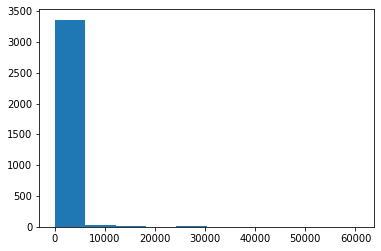

In [31]:
plt.hist(x=sentences_df['len_most_relevant_sentences'])
plt.show()

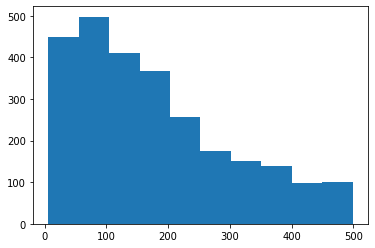

In [35]:
plt.hist(x=sentences_df[sentences_df['len_most_relevant_sentences'] < 500]['len_most_relevant_sentences'])
plt.show()

In [32]:
# what percent of the sentences are shorter than a certain word limit?
# useful for choosing where to truncate the sentences!
for word_limit in [50, 100, 150, 200, 250, 500]:
    print(sum(sentences_df['len_most_relevant_sentences'] < word_limit) / sentences_df.shape[0])

0.11388318168476666
0.26592309950102727
0.3891987085412386
0.49721162312885236
0.5755796888758439
0.7769298503081891
